In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as skc
import numpy as np
from sklearn.metrics import silhouette_score

In [13]:
df = pd.read_csv('../data.csv', index_col = 0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)
df_scaled.drop(['ID'], inplace=True, axis=1)

In [10]:
colors = ['black', 'darkgreen', 'brown', 'blue',
         'grey', 'cyan', 'blue', 'navy',
         'pink', 'orange', 'orchid']

In [4]:
bandwidth = skc.estimate_bandwidth(df_scaled)
print(bandwidth)

1.5053365981707103


In [11]:
from sklearn.decomposition import PCA

In [14]:
pca  = PCA(n_components=5)
pca_res = pca.fit_transform(df_scaled)
print(pca.explained_variance_)
df_pca5 = pd.DataFrame(pca_res, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])

[0.77027329 0.26559467 0.17640023 0.10656711 0.07643478]


In [7]:
bandwidth = skc.estimate_bandwidth(df_pca5)
print(bandwidth)

1.197535879151282


In [15]:
ms = skc.MeanShift(bandwidth=0.5, n_jobs=-1)
ms.fit(df_pca5)

MeanShift(bandwidth=0.5, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=-1, seeds=None)

In [16]:
df['Labels'] = ms.labels_
df_pca5['Labels'] = ms.labels_

In [17]:
print(max(ms.labels_))
print(silhouette_score(df_pca5, ms.labels_))

6
0.539951087615788


In [18]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

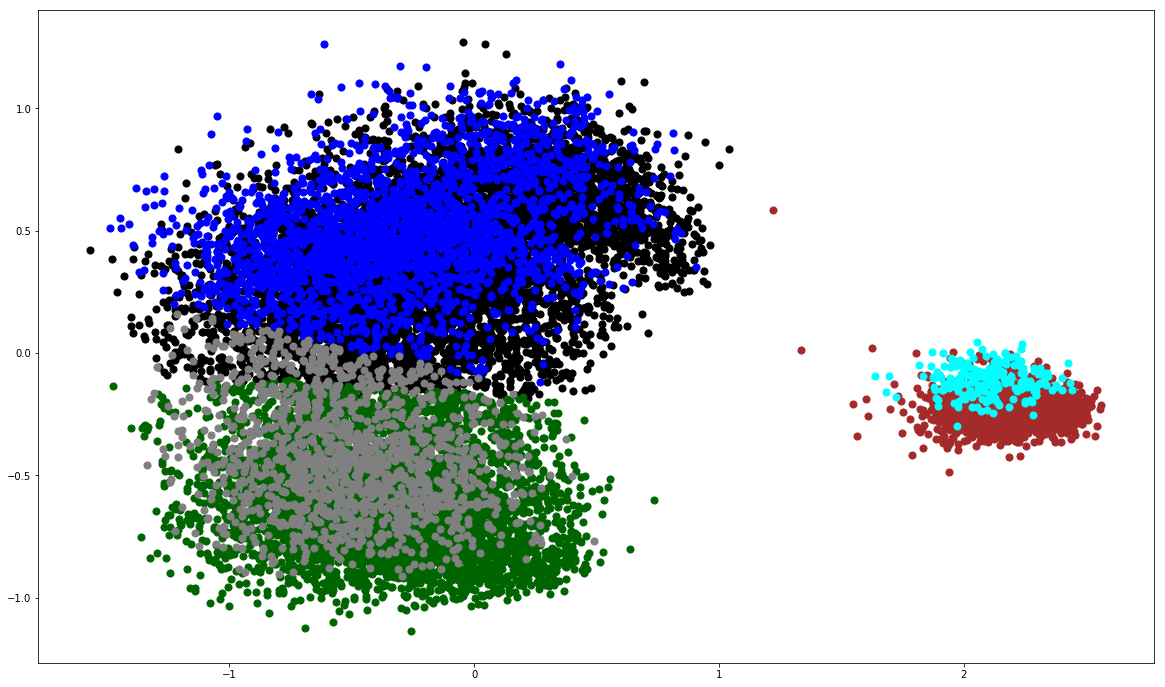

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(20,12))
for j in range(max(ms.labels_)):
    cluster = df_pca5[df_pca5['Labels'] == j]
    plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=50)
    
    
plt.savefig('meanshift_bandwith05_pca')

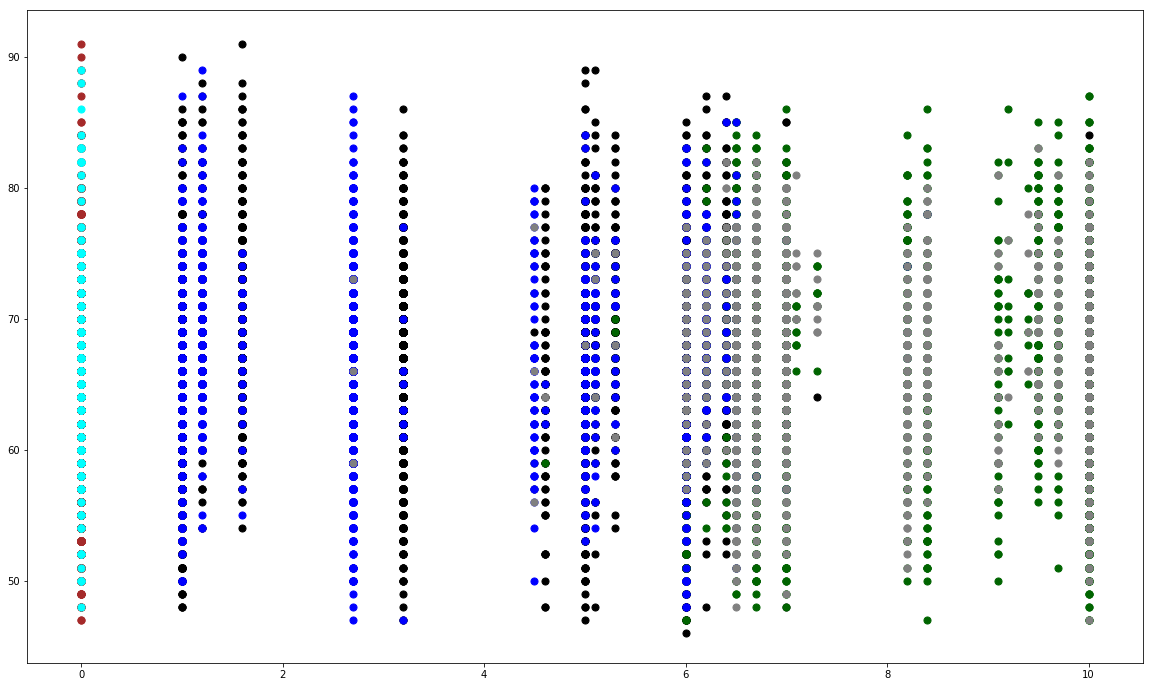

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(20,12))
for j in range(max(ms.labels_)):
    cluster = df[df['Labels'] == j]
    plt.scatter(cluster['Position'], cluster['Overall'], color=colors[j], s=50)
    
    
plt.savefig('../meanshift_bandwith05')